# ___OPTICS - Unsupervised Machine Learning___
---

## ___What is OPTICS?___

_OPTICS Clustering stands for __Ordering Points To Identify Cluster Structure__. It draws inspiration from the DBSCAN clustering algorithm. It adds two more terms to the concepts of DBSCAN clustering. But it addresses one of DBSCAN’s major weaknesses: the problem of detecting meaningful clusters in data of varying density._

### ___Core Distance___
_It is the minimum value of radius required to classify a given point as a core point. If the given point is not a Core point, then it’s Core Distance is undefined._

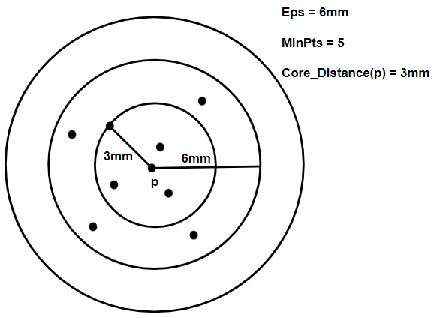

### ___Reachability Distance___
_It is defined with respect to another data point q(Let). The Reachability distance between a point p and q is the maximum of the Core Distance of p and the Euclidean Distance(or some other distance metric) between p and q. Note that The Reachability Distance is not defined if q is not a Core point._

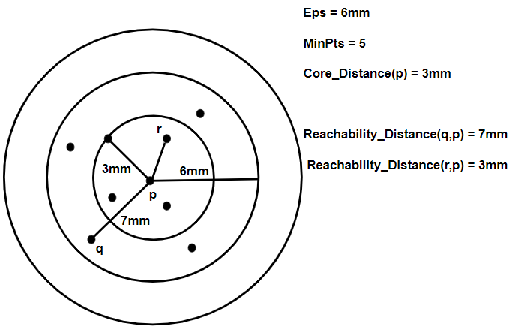

_This clustering technique is different from other clustering techniques in the sense that this technique does not explicitly segment the data into clusters. Instead, it produces a visualization of Reachability distances and uses this visualization to cluster the data._

## ___Reachability-plot to Clustering___
_Using a reachability-plot (a special kind of dendrogram), the hierarchical structure of the clusters can be obtained easily. It is a 2D plot, with the ordering of the points as processed by OPTICS on the x-axis and the reachability distance on the y-axis. Since points belonging to a cluster have a low reachability distance to their nearest neighbor, the clusters show up as valleys in the reachability plot. The deeper the valley, the denser the cluster._

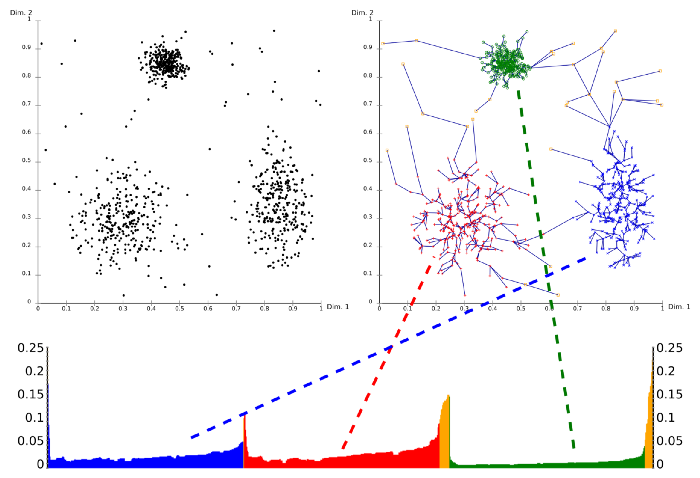

_The image above illustrates this concept. In its upper left area, a synthetic example data set is shown. The upper right part visualizes the spanning tree produced by OPTICS, and the lower part shows the reachability plot as computed by OPTICS. Colors in this plot are labels, and not computed by the algorithm; but it is well visible how the valleys in the plot correspond to the clusters in above data set. The yellow points in this image are considered noise, and no valley is found in their reachability plot. They are usually not assigned to clusters, except the omnipresent “all data” cluster in a hierarchical result._

_Extracting clusters from this plot can be done manually by selecting a range on the x-axis after visual inspection, by selecting a threshold on the y-axis (the result is then similar to a DBSCAN clustering result with the same ε and minPts parameters; here a value of 0.1 may yield good results), or by different algorithms that try to detect the valleys by steepness, knee detection, or local maxima. Clusterings obtained this way usually are hierarchical, and cannot be achieved by a single DBSCAN run._

_Below is a few more example of demonstrating the relationship between clustering and reachability distance._

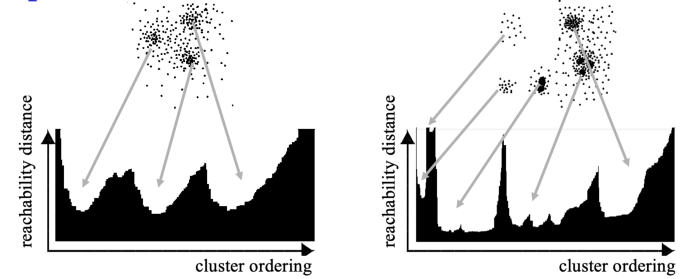

_[Reference](https://medium.com/@darkprogrammerpb/optics-clustering-algorithm-from-scratch-8d66960e238)_

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib import gridspec 
from sklearn.cluster import OPTICS, cluster_optics_dbscan 
from sklearn.preprocessing import normalize, StandardScaler

In [2]:
X = pd.read_csv(r'C:\Users\PiyushSin\Desktop\datasets\Mall_Customers.csv') 
  
# Dropping irrelevant columns 
drop_features = ['CustomerID', 'Gender'] 
X = X.drop(drop_features, axis = 1) 
  
# Handling the missing values if any 
X.fillna(method ='ffill', inplace = True) 
  
X.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [3]:
# Scaling the data to bring all the attributes to a comparable level 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X) 
  
# Normalizing the data so that the data 
# approximately follows a Gaussian distribution 
X_normalized = normalize(X_scaled) 
  
# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized) 
  
# Renaming the columns 
X_normalized.columns = X.columns 
  
X_normalized.head() 

,Age,Annual Income (k$),Spending Score (1-100)
0,-0.622173,-0.759499,-0.189897
1,-0.518894,-0.704396,0.484330
2,-0.488556,-0.614244,-0.619691
3,-0.495541,-0.740949,0.453247
4,-0.313049,-0.923896,-0.220036


In [4]:
# Building the OPTICS Clustering model 
optics_model = OPTICS(min_samples = 10, xi = 0.05, min_cluster_size = 0.05) 
  
# Training the model 
optics_model.fit(X_normalized) 

OPTICS(min_cluster_size=0.05, min_samples=10)

In [5]:
optics_model.reachability_

array([       inf, 0.22893923, 0.4820297 , 0.17700195, 0.4820297 ,
       0.17700195, 0.38997252, 0.17066541, 0.25457801, 0.16582072,
       0.32150231, 0.28525436, 0.25362032, 0.17700195, 0.38997252,
       0.17700195, 0.38997252, 0.4820297 , 0.24517434, 0.2936838 ,
       0.38997252, 0.15525133, 0.30290844, 0.16582072, 0.24517434,
       0.17066541, 0.29240812, 0.22210442, 0.38588347, 0.17066541,
       0.24517434, 0.15525133, 0.24830976, 0.24071262, 0.24830976,
       0.20465975, 0.3520029 , 0.15525133, 0.38997252, 0.20465975,
       0.28956651, 0.24071262, 0.24517434, 0.15525133, 0.24517434,
       0.20465975, 0.31588199, 0.32028167, 0.40904856, 0.4820297 ,
       0.31588199, 0.15525133, 0.22893923, 0.19408987, 0.28956651,
       0.24517434, 0.29091359, 0.29091359, 0.32028167, 0.30272509,
       0.1775904 , 0.36158403, 0.1775904 , 0.22437762, 0.14199091,
       0.36158403, 0.35995566, 0.14134342, 0.36158403, 0.35771288,
       0.14134342, 0.24517434, 0.14134342, 0.14134342, 0.14134

In [6]:
optics_model.core_distances_

array([0.4820297 , 0.17700195, 0.51300796, 0.18545541, 0.53012116,
       0.18519189, 0.5028884 , 0.2384654 , 0.25362032, 0.22210442,
       0.25457801, 0.45466219, 0.24517434, 0.18465859, 0.44557365,
       0.15525133, 0.48466194, 0.22893923, 0.30440217, 0.46282693,
       0.48652156, 0.1893833 , 0.38997252, 0.21171346, 0.281036  ,
       0.2484526 , 0.38588347, 0.39978415, 0.38997252, 0.24071262,
       0.34136274, 0.20465975, 0.39719164, 0.31943233, 0.3520029 ,
       0.24414759, 0.40815261, 0.17066541, 0.53185101, 0.32278353,
       0.30868395, 0.3896088 , 0.29240812, 0.20846948, 0.24830976,
       0.28703957, 0.50484698, 0.49958445, 0.50965629, 0.48613693,
       0.45353791, 0.16582072, 0.32028167, 0.30722322, 0.32622471,
       0.32191643, 0.33986032, 0.1775904 , 0.36593418, 0.29091359,
       0.19534191, 0.36767766, 0.14199091, 0.33470599, 0.14134342,
       0.35834494, 0.5144765 , 0.16771068, 0.36158403, 0.49432863,
       0.16748504, 0.28956651, 0.17184649, 0.19408987, 0.14199

In [7]:
optics_model.ordering_

array([  0,   2,   4,  17,   1,   3,   5,  13,  15,  21,  31,  37,  43,
        51,   9,  23,   7,  25,  29,  35,  39,  45,  81,  27,  52,  33,
        41,  11,  19,  88,  47,  58,  69,  68,  61,  65,  75,  78,  84,
        87,  95,  97,  99, 103, 111, 113, 114, 115,  91, 100, 105, 120,
        94, 124, 132,  48, 134, 138, 142, 144, 162, 112, 121, 148, 156,
       158, 166, 126, 150, 152, 130, 136, 154, 170, 174, 182, 164, 176,
       178, 140, 146, 168, 172, 188, 128, 160, 186, 192, 180, 190, 198,
       194, 196, 184,  93,  98,  79,  10,   8,  12,  18,  24,  30,  42,
        44,  55,  71,  32,  34,  83,  40,  54,  26,  59,  56,  57,  60,
        62,  64,  67,  70,  72,  73,  74,  80,  82,  89,  92,  96, 101,
       106, 107, 108, 109, 110, 116,  90, 102,  85,  86,  53, 118,  63,
       104,  76, 119,  22,  77,  46,  50, 117,  36,  66,  28,   6,  14,
        16,  20,  38,  49, 125, 133, 135, 137, 145, 147, 155, 157, 159,
       161, 163, 175, 139, 143, 141, 149, 167, 185, 181, 183, 17

In [8]:
# Producing the labels according to the DBSCAN technique with eps = 0.5 
labels1 = cluster_optics_dbscan(reachability = optics_model.reachability_, 
                                   core_distances = optics_model.core_distances_, 
                                   ordering = optics_model.ordering_, eps = 0.5) 
  
# Producing the labels according to the DBSCAN technique with eps = 2.0 
labels2 = cluster_optics_dbscan(reachability = optics_model.reachability_, 
                                   core_distances = optics_model.core_distances_, 
                                   ordering = optics_model.ordering_, eps = 2) 
  
# Creating a numpy array with numbers at equal spaces till 
# the specified range 
space = np.arange(len(X_normalized)) 
  
# Storing the reachability distance of each point 
reachability = optics_model.reachability_[optics_model.ordering_] 
  
# Storing the cluster labels of each point 
labels = optics_model.labels_[optics_model.ordering_] 
  
print(labels) 

[-1 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  2  2  2  2  2
  2  2  2  2  2  2  2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1  3  3  3  3  3  3  3  3  3  3  3  3  3 -1 -1 -1 -1 -1  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  5  5  5  5  5  5  5  5
  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  5  5  5  5  5  5  5]


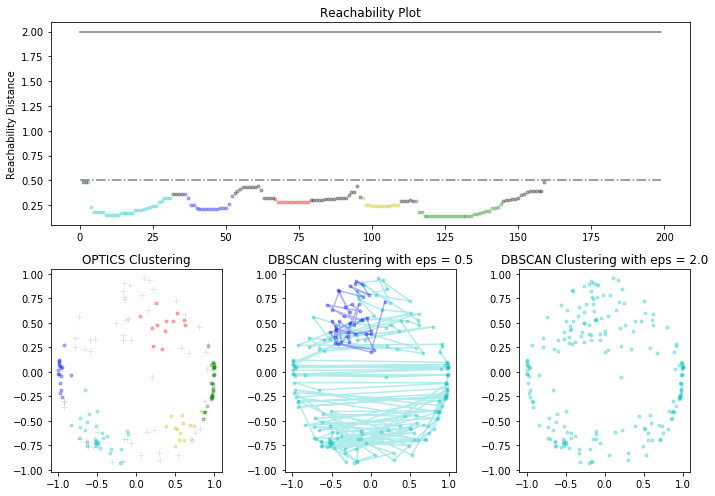

In [13]:
# Defining the framework of the visualization 
plt.figure(figsize =(10, 7)) 
G = gridspec.GridSpec(2, 3) 
ax1 = plt.subplot(G[0, :]) 
ax2 = plt.subplot(G[1, 0]) 
ax3 = plt.subplot(G[1, 1]) 
ax4 = plt.subplot(G[1, 2]) 
  
# Plotting the Reachability-Distance Plot 
colors = ['c.', 'b.', 'r.', 'y.', 'g.'] 
for Class, colour in zip(range(0, 5), colors): 
    Xk = space[labels == Class] 
    Rk = reachability[labels == Class] 
    ax1.plot(Xk, Rk, colour, alpha = 0.3) 
ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha = 0.3) 
ax1.plot(space, np.full_like(space, 2., dtype = float), 'k-', alpha = 0.5) 
ax1.plot(space, np.full_like(space, 0.5, dtype = float), 'k-.', alpha = 0.5) 
ax1.set_ylabel('Reachability Distance') 
ax1.set_title('Reachability Plot') 

# Plotting the OPTICS Clustering 
colors = ['c.', 'b.', 'r.', 'y.', 'g.'] 
for Class, colour in zip(range(0, 5), colors): 
    Xk = X_normalized[optics_model.labels_ == Class] 
    ax2.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3) 
      
ax2.plot(X_normalized.iloc[optics_model.labels_ == -1, 0], 
        X_normalized.iloc[optics_model.labels_ == -1, 1], 
       'k+', alpha = 0.1) 
ax2.set_title('OPTICS Clustering')

# Plotting the DBSCAN Clustering with eps = 0.5 
colors = ['c', 'b', 'r', 'y', 'g', 'greenyellow'] 
for Class, colour in zip(range(0, 6), colors): 
    Xk = X_normalized[labels1 == Class] 
    ax3.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3, marker ='.') 
        
ax3.plot(X_normalized.iloc[labels1 == -1, 0], 
        X_normalized.iloc[labels1 == -1, 1], 
       'k+', alpha = 0.1) 
ax3.set_title('DBSCAN clustering with eps = 0.5') 

# Plotting the DBSCAN Clustering with eps = 2.0 
colors = ['c.', 'y.', 'm.', 'g.'] 
for Class, colour in zip(range(0, 4), colors): 
    Xk = X_normalized.iloc[labels2 == Class] 
    ax4.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3) 
          
ax4.plot(X_normalized.iloc[labels2 == -1, 0], 
        X_normalized.iloc[labels2 == -1, 1], 
       'k+', alpha = 0.1) 
ax4.set_title('DBSCAN Clustering with eps = 2.0') 
  
  
plt.tight_layout() 
plt.show() 

## ___OPTICS Clustering v/s DBSCAN Clustering___

* ___Memory Cost___ _: The OPTICS clustering technique requires more memory as it maintains a priority queue (Min Heap) to determine the next data point which is closest to the point currently being processed in terms of Reachability Distance. It also requires more computational power because the nearest neighbour queries are more complicated than radius queries in DBSCAN._
* ___Fewer Parameters___ _: The OPTICS clustering technique does not need to maintain the epsilon parameter and is only given to reduce the time taken. This leads to the reduction of the analytical process of parameter tuning._
* _This technique does not segregate the given data into clusters. It merely produces a Reachability distance plot and it is upon the interpretation of the programmer to cluster the points accordingly._